<a href="https://colab.research.google.com/github/PRANAVTURLAPATI/Data-Visualization-Projects-with-Python-Libraries/blob/main/Using%20Support%20Vector%20Machines%20II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Support Vector Machine Classification model for classification of different species of Penguins.


---

In [ ]:
# Import the required modules and load the dataset
import pandas as pd
# Load the DataFrame
df = pd.read_csv("https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/penguin.csv")
# Display the first five rows of the DataFrame
print(df.head())

  species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0  Adelie  Torgersen            39.1  ...              181.0       3750.0    Male
1  Adelie  Torgersen            39.5  ...              186.0       3800.0  Female
2  Adelie  Torgersen            40.3  ...              195.0       3250.0  Female
3  Adelie  Torgersen             NaN  ...                NaN          NaN     NaN
4  Adelie  Torgersen            36.7  ...              193.0       3450.0  Female

[5 rows x 7 columns]


In [ ]:
# Print the dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


In [ ]:
# Print the number of missing values in each column
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
# Drop the missing values and verify
# Drop the NAN values
df.dropna(inplace = True)
# Verify the above by printing number of missing values in each column.
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
# Display the number of occurrences of each species of Penguin in the 'species' column.
df["species"].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [ ]:
# Add numeric column 'label' to resemble non numeric column 'species
df["label"] = df["species"].map({"Adelie" : 0, "Gentoo" : 1, "Chinstrap" : 2})
# Print first five rows of the DataFrame
print(df.head())

  species     island  bill_length_mm  ...  body_mass_g     sex  label
0  Adelie  Torgersen            39.1  ...       3750.0    Male      0
1  Adelie  Torgersen            39.5  ...       3800.0  Female      0
2  Adelie  Torgersen            40.3  ...       3250.0  Female      0
4  Adelie  Torgersen            36.7  ...       3450.0  Female      0
5  Adelie  Torgersen            39.3  ...       3650.0    Male      0

[5 rows x 8 columns]


In [ ]:
# Display the number of occurrences of each species of Penguin in the 'label' column.
df["label"].value_counts()

0    146
1    119
2     68
Name: label, dtype: int64

In [ ]:
# Convert the non-numeric column 'sex' to numeric in the DataFrame
# Print the number of occurance of each label in 'sex' column
print(df["sex"].value_counts())
# Convert the 'sex' column to numeric
df["sex"] = df["sex"].map({"Male" : 0, "Female" : 1})
# Print the number of occurance of each label in 'sex' column after converting
print(df["sex"].value_counts())
# Print the Datatype of the 'sex' column
print(df["sex"].dtype)

Male      168
Female    165
Name: sex, dtype: int64
0    168
1    165
Name: sex, dtype: int64
int64


In [ ]:
# Convert the non-numeric column 'island' to numeric in the DataFrame
# Print the number of occurance of each label in 'island' column
print(df["island"].value_counts())
# Convert the 'island' column to numeric
df["island"] = df["island"].map({"Biscoe" : 0, "Dream" : 1, "Torgersen" : 2})
# Print the number of occurance of each label in 'island' column after converting
print(df["island"].value_counts())
# Print the Datatype of the 'island' column
print(df["island"].dtype)

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64
0    163
1    123
2     47
Name: island, dtype: int64
int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


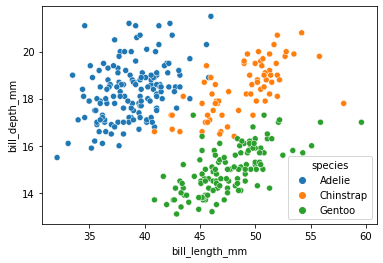

In [ ]:
# Create a scatter plot between 'bill_length_mm' and 'bill_depth_mm' 
import seaborn as sns
sns.scatterplot(df["bill_length_mm"], df["bill_depth_mm"], hue = df["species"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


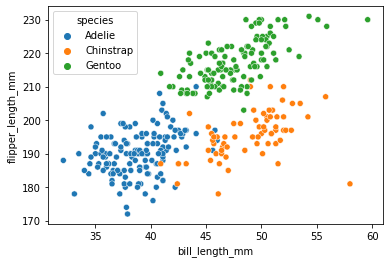

In [ ]:
# Create a scatter plot between 'bill_length_mm' and 'flipper_length_mm' 
sns.scatterplot(df["bill_length_mm"], df["flipper_length_mm"], hue = df["species"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


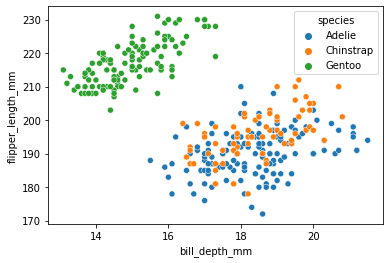

In [ ]:
# Create a scatter plot between 'bill_depth_mm' and 'flipper_length_mm' 
sns.scatterplot(df["bill_depth_mm"], df["flipper_length_mm"], hue = df["species"])

In [ ]:
# Split the data into Training and Testing set
# Import all the libraries
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ["species", "label"]), df["label"], random_state = 42, test_size = 0.33)

In [ ]:
# Build a SVC model using the 'sklearn' module.
from sklearn.svm import SVC
# 1. First, call the linear 'SVC' module and store it in a variable.
Object_SVC = SVC(kernel = 'linear')
# 2. Call the 'fit()' function with 'x_train' and 'y_train' as inputs.
Object_SVC.fit(x_train, y_train)
# 3. Call the 'score()' function with 'x_train' and 'y_train' as inputs to check the accuracy score of the model.
print(Object_SVC.score(x_train, y_train))

1.0


In [ ]:
# Make predictions on the train dataset by using the 'predict()' function.
# Compute the predictions
y_train_pred = Object_SVC.predict(x_train)
# Print the occurrence of each type computed in the predictions.
print(pd.Series(y_train_pred).value_counts())

0    94
1    81
2    48
dtype: int64


In [ ]:
#Make predictions on the test dataset by using the 'predict()' function.
# Compute the predictions
y_test_pred = Object_SVC.predict(x_test)
# Print the occurrence of each Penguin type computed in the predictions.
print(pd.Series(y_test_pred).value_counts())

0    52
1    38
2    20
dtype: int64


In [ ]:
# Print the confusion matrix for the actual and predicted data of the test set 
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_test_pred))

[[52  0  0]
 [ 0 38  0]
 [ 0  0 20]]


In [ ]:
# Print the classification report for the actual and predicted data of the testing set (if required)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        20

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110



the model predicts it accurately, f1 = 100%

---